<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/DeepLearning/MNIST/Keras_220926_MNIST_%EC%8B%A4%EC%8A%B506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -s /content/drive/MyDrive /mydrive

In [3]:
%cd /mydrive

/content/drive/MyDrive


In [4]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


## __배치정규화 후 모델 간소화__
--

1. batchsize 조정

2. optimizer 학습률 조정

3. dropout 줄이기

In [5]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [8]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [9]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

#### __1. BatchNormalization, 출력 직전층 activation='sigmoid', optimizer='rmsprop'__ 

In [10]:
model_1_1 = keras.Sequential()
model_1_1.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('relu'))
model_1_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1_1.add(layers.Conv2D(32, (3, 3)))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('relu'))
model_1_1.add(layers.MaxPooling2D((2,2)))
model_1_1.add(layers.Conv2D(64, (3, 3)))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('relu'))
model_1_1.add(layers.Dropout(0.5))
model_1_1.add(layers.Flatten())
model_1_1.add(layers.Dense(64))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('sigmoid'))
model_1_1.add(layers.Dense(10, activation="softmax"))

model_1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       1

In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.002)
model_1_1.compile(optimizer=rmsprop, loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('mnist/try06_1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1_1 = model_1_1.fit(train_imgs, train_labels, epochs=100, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9608
Epoch 1: val_accuracy improved from -inf to 0.98617, saving model to mnist/try06_1.h5
1500/1500 [==============================] - 22s 6ms/step - loss: 0.1901 - accuracy: 0.9609 - val_loss: 0.0469 - val_accuracy: 0.9862
Epoch 2/100
1494/1500 [============================>.] - ETA: 0s - loss: 0.0701 - accuracy: 0.9780
Epoch 2: val_accuracy did not improve from 0.98617
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0699 - accuracy: 0.9781 - val_loss: 0.0786 - val_accuracy: 0.9776
Epoch 3/100
1496/1500 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9823
Epoch 3: val_accuracy did not improve from 0.98617
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 4/100
1500/1500 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9842
Epoch 4: val_acc

In [19]:
result = model_1_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9938

테스트 정확도: 0.9938


In [20]:
loaded_model = load_model('mnist/try06_1.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.9938

불러온 모델 테스트 정확도: 0.9938


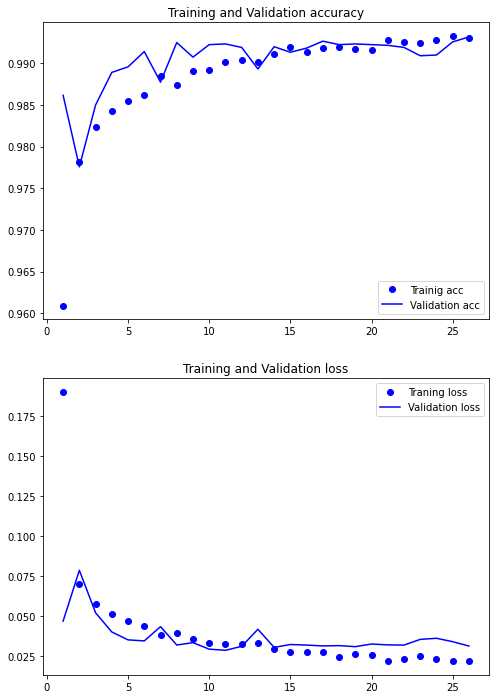

In [21]:
acc = hist_1_1.history['accuracy']
val_acc = hist_1_1.history['val_accuracy']
loss = hist_1_1.history['loss']
val_loss = hist_1_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [22]:
df = pd.DataFrame([['CNN', 'model_1_1', '32(relu/batchnomalization)-32(relu/batchnomalization)-64(relu/batchnomalization/drop0.5)-Flatten-64(relu)-10(softmax)]',
                    'rmsprop', 100, 32, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]],
                  columns=['모델', 'Name', 'Structure', 'Optimizer', 'epochs', 'batch_size', 'validation_split', 'callback', 'Accuracy', 'MC_Accuracy', 'Loss', 'MC_Loss'])

#### __3.  batch_size=32, 출력 직전층 activation='sigmoid', optimizer='adam'__ 

In [23]:
model_1_2 = keras.Sequential()
model_1_2.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('relu'))
model_1_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1_2.add(layers.Conv2D(32, (3, 3)))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('relu'))
model_1_2.add(layers.MaxPooling2D((2,2)))
model_1_2.add(layers.Conv2D(64, (3, 3)))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('relu'))
model_1_2.add(layers.Dropout(0.5))
model_1_2.add(layers.Flatten())
model_1_2.add(layers.Dense(64))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('sigmoid'))
model_1_2.add(layers.Dense(10, activation="softmax"))

model_1_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 11, 11, 32)      

In [24]:
adam = keras.optimizers.Adam(learning_rate=0.002)
model_1_2.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('mnist/try06_2.h5', monitor='val_accuracy', mode='max', verbose=1)
hist_1_2 = model_1_2.fit(train_imgs, train_labels, epochs=100, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
1497/1500 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.9579
Epoch 1: saving model to mnist/try06_2.h5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2172 - accuracy: 0.9579 - val_loss: 0.0447 - val_accuracy: 0.9881
Epoch 2/100
1500/1500 [==============================] - ETA: 0s - loss: 0.0691 - accuracy: 0.9798
Epoch 2: saving model to mnist/try06_2.h5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0691 - accuracy: 0.9798 - val_loss: 0.0395 - val_accuracy: 0.9882
Epoch 3/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.0553 - accuracy: 0.9830
Epoch 3: saving model to mnist/try06_2.h5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 4/100
1498/1500 [============================>.] - ETA: 0s - loss: 0.0475 - accuracy: 0.9856
Epoch 4: saving model to mnist/try06_2.h5
1500/1500 [==========================

In [26]:
result = model_1_2.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0205 - accuracy: 0.9943

테스트 정확도: 0.9943


In [27]:
loaded_model = load_model('mnist/try06_2.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.9943

불러온 모델 테스트 정확도: 0.9943


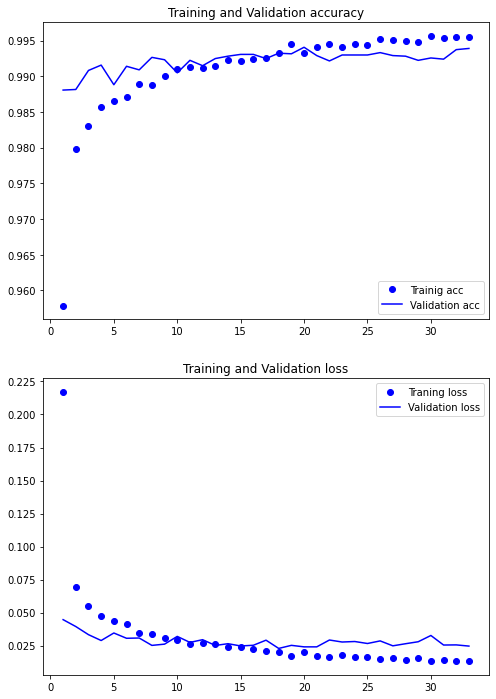

In [28]:
acc = hist_1_2.history['accuracy']
val_acc = hist_1_2.history['val_accuracy']
loss = hist_1_2.history['loss']
val_loss = hist_1_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [29]:
df.loc[1]=['CNN', 'model_1_2', '32(relu/batchnomalization)-32(relu/batchnomalization)-64(relu/batchnomalization/drop0.5)-Flatten-64(relu)-10(softmax)]', 'adam', 100, 32, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]

In [30]:
df.head()

,모델,Name,Structure,Optimizer,epochs,batch_size,validation_split,callback,Accuracy,MC_Accuracy,Loss,MC_Loss
0,CNN,model_1_1,32(relu/batchnomalization)-32(relu/batchnomali...,rmsprop,100,32,0.2,es/mc,0.9938,0.9938,0.0217,0.0217
1,CNN,model_1_2,32(relu/batchnomalization)-32(relu/batchnomali...,adam,100,32,0.2,es/mc,0.9943,0.9943,0.0205,0.0205


In [31]:
df.to_csv("./mnist/220921_실습_6.csv", header=True, sep=',', na_rep='NaN', float_format = '%.4f', encoding='utf-8-sig', line_terminator='\n')